A partir de los datos de iris:

Ejercicio 1:

- Carga los datos originales
- Utiliza PCA para reducir la dimensionalidad de los datos. No reemplaces X con el resultado, crea una nueva X_pca. Utiliza PCA(2) y otra con PCA(3)
- Utiliza Kmeans para agrupar y predecir las clases de los nuevos datos.
- Compara los resultados para PCA(2) y PCA(3) con las clases originales (y_real).
- ¿Es mejor PCA(2) o PCA(3)?

Ejercicio 2: 

- Repite el proceso con T-SNE y DBSCAN. ¿Cuál da mejores resultados?


In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### PARTE I. PCA y KMEANS

In [69]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2, random_state=42)
pca3 = PCA(n_components=3, random_state=42)

X_pca2 = pca2.fit_transform(X)
X_pca3 = pca3.fit_transform(X)

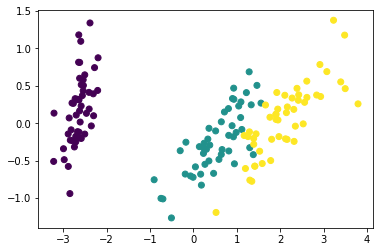

In [70]:
import matplotlib.pyplot as plt

plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y)

In [71]:
import plotly.express as px

fig = px.scatter_3d(x=X_pca3[:, 0], y=X_pca3[:, 1], z=X_pca3[:, 2], color=y, opacity=0.7)
fig.show()

In [81]:
from sklearn.cluster import KMeans
import numpy as np

kmeans2 = KMeans(n_clusters=2, random_state=42).fit(X_pca2)
kmeans3 = KMeans(n_clusters=3, random_state=42).fit(X_pca3)

In [82]:
y_k2 = kmeans2.predict(X_pca2)
y_k3 = kmeans3.predict(X_pca3)

In [83]:
from sklearn.metrics import accuracy_score

k2_score = accuracy_score(y, y_k2)
k3_score = accuracy_score(y, y_k3)

print('PCA2_Score:', k2_score)
print('PCA3_Score:', k3_score)

PCA2_Score: 0.02
PCA3_Score: 0.24


### PARTE II TSNE y DBSCAN

In [3]:
from sklearn.manifold import TSNE

tsne2 = TSNE(n_components=2, random_state=42)
tsne3 = TSNE(n_components=3, random_state=42)

X_tsne2 = tsne2.fit_transform(X)
X_tsne3 = tsne3.fit_transform(X)

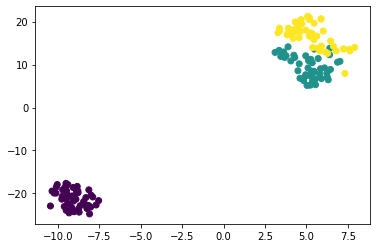

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_tsne2[:, 0], X_tsne2[:, 1], c=y)

In [4]:
import plotly.express as px

fig = px.scatter_3d(x=X_tsne3[:, 0], y=X_tsne3[:, 1], z=X_tsne3[:, 2], color=y, opacity=0.7)
fig.show()

In [4]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score

X_scan2 = StandardScaler().fit_transform(X_tsne2)
X_scan3 = StandardScaler().fit_transform(X_tsne3)

In [5]:
db2 = DBSCAN(eps=0.2, min_samples=5).fit(X_scan2)
db3 = DBSCAN(eps=0.65, min_samples=3).fit(X_scan3)

core_samples_mask = np.zeros_like(db2.labels_, dtype=bool)
core_samples_mask[db2.core_sample_indices_] = True
y_db2 = db2.labels_

core_samples_mask = np.zeros_like(db3.labels_, dtype=bool)
core_samples_mask[db3.core_sample_indices_] = True
y_db3 = db3.labels_

In [6]:
db2_score = accuracy_score(y, y_db2)
db3_score = accuracy_score(y, y_db3)

print('TSNE2_Score:', db2_score)
print('TSNE3_Score:', db3_score)

TSNE2_Score: 0.6666666666666666
TSNE3_Score: 0.54
